In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()
        self.lin = torch.nn.Linear(784, 3) # initializes a linear transformation for incoming data that feeds 784 inputs into 3 hidden layer nodes

    def forward(self, x):
        # x.shape = (n_batch, n_features)
        ### implement the foward function
        outputs = self.lin(x) # applies the linear transformation to the x data
        # print('The outputs of OneLayerNetwork forward are: ', outputs)
        return outputs

In [ ]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### implement TwoLayerNetwork with torch.nn.Linear
        self.lin1 = torch.nn.Linear(784, 400) # initializes a linear transform for incoming data that feeds 784 inputs into 400 hidden layers
        self.sigmoid = torch.nn.Sigmoid() # initializes a sigmoid activation function
        self.lin2 = torch.nn.Linear(400, 3) # initializes a linear transform of the hidden layer that feeds 400 hidden layer nodes into 3 nodes in the next layer

    def forward(self, x):
        # x.shape = (n_batch, n_features)
        ### implement the foward function
        hidden = self.lin1(x) # applies linear transformation to the x data
        activation = self.sigmoid(hidden) # applies the sigmoid activation function to each of the hidden layer 1 outputs
        outputs = self.lin2(activation) # applies linear transformation to the activated outputs from the hidden layer
        return outputs

In [ ]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [ ]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [ ]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [ ]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            ### implement the training process
            optimizer.zero_grad()
            y_preds = model.forward(batch_X)
            train_loss = criterion(y_preds, batch_y)
            train_loss.backward()
            optimizer.step()
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

The label for this image is:  1
The label for this image is:  0
The label for this image is:  2
Data preparation...
All of the train y values are:  tensor([1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1,
        2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0,
        2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0,
        0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2,
        1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1,
        0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
        2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2,
        1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2,
        1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0,
        0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1,

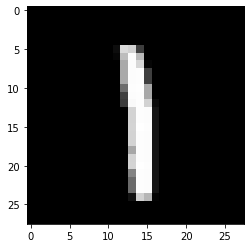

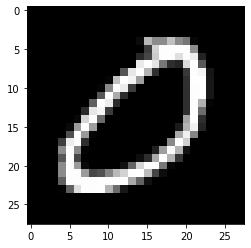

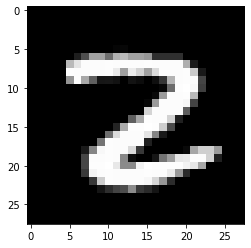

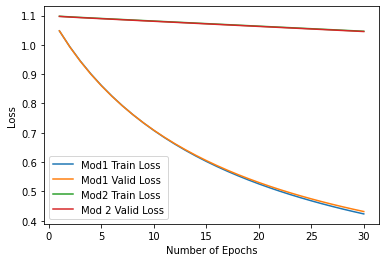

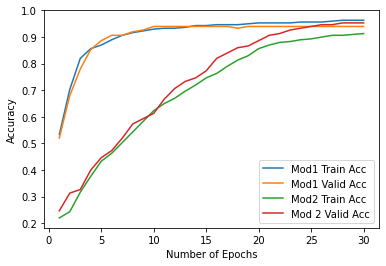

The final accuracy of model one is:  tensor(0.9333)
The final accuracy of model two is:  tensor(0.9267)
| epoch  1 | train loss 0.683253 | train acc 0.943333 | valid loss 0.679600 | valid acc 0.926667 |
| epoch  2 | train loss 0.466968 | train acc 0.976667 | valid loss 0.473961 | valid acc 0.946667 |
| epoch  3 | train loss 0.350524 | train acc 0.980000 | valid loss 0.363079 | valid acc 0.946667 |
| epoch  4 | train loss 0.281934 | train acc 0.980000 | valid loss 0.298058 | valid acc 0.946667 |
| epoch  5 | train loss 0.237199 | train acc 0.980000 | valid loss 0.255965 | valid acc 0.960000 |
| epoch  6 | train loss 0.205600 | train acc 0.980000 | valid loss 0.226478 | valid acc 0.966667 |
| epoch  7 | train loss 0.181920 | train acc 0.980000 | valid loss 0.204587 | valid acc 0.966667 |
| epoch  8 | train loss 0.163375 | train acc 0.980000 | valid loss 0.187617 | valid acc 0.966667 |
| epoch  9 | train loss 0.148357 | train acc 0.983333 | valid loss 0.174024 | valid acc 0.966667 |
| epo

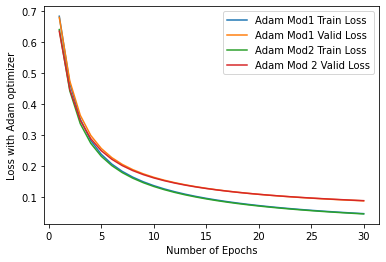

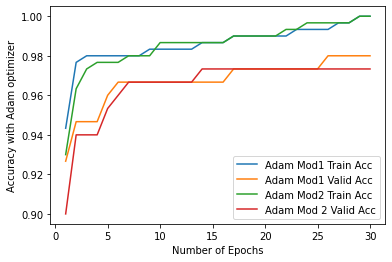

The final accuracy of model one using Adam optimizer is:  tensor(0.9733)
The final accuracy of model two using Adam optimizer is:  tensor(0.9667)


In [ ]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path
    data_directory_path =  "/content/drive/My Drive/Fall2020"

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "hw3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "hw3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "hw3_test.csv"))

    ### print out three training images with different labels
    plot_img(X_train[0])
    print('The label for this image is: ', y_train[0])
    plot_img(X_train[13])
    print('The label for this image is: ', y_train[13])
    plot_img(X_train[245])
    print('The label for this image is: ', y_train[245])

    print("Data preparation...")

    ### convert numpy arrays to tensors
    X_train_tensors = torch.from_numpy(X_train)
    y_train_tensors = torch.from_numpy(y_train)
    print('All of the train y values are: ', y_train_tensors)

    X_valid_tensors = torch.from_numpy(X_valid)
    y_valid_tensors = torch.from_numpy(y_valid)
    print('All of the valid y values are: ', y_valid_tensors)

    X_test_tensors = torch.from_numpy(X_test)
    y_test_tensors = torch.from_numpy(y_test)
    print('All of the test y values are: ', y_valid_tensors)

    ### prepare dataloaders for training, validation, and testing
    ### we expect to get a batch of pairs (x_n, y_n) from the dataloader
    train_dta = TensorDataset(X_train_tensors, y_train_tensors) # creates a dataset composed of tuples (x_n, y_n)
    valid_dta = TensorDataset(X_valid_tensors, y_valid_tensors)
    test_dta = TensorDataset(X_test_tensors, y_test_tensors)

    train_loader = DataLoader(train_dta, batch_size=10) # creates a dataloader (an iterable over the dataset) that returns the data over x and y in a batch size of 10
    valid_loader = DataLoader(valid_dta, batch_size=10)
    test_loader = DataLoader(test_dta, batch_size=10)
    for i, data in enumerate(train_loader):
      print(f'Batch #{i}')
      x_img, y_label = data
    print(f"There are {x_img.shape[0]} x_imgs in this batch. Each x_img has {x_img.shape[1]} pixels.")
    print('The y labels corresponding to each x_img in this batch: ', y_label)

    ### prepare OneLayerNetwork, criterion, and optimizer
    model_one = OneLayerNetwork() # creates an instance of OneLayerNetwork
    criterion = torch.nn.CrossEntropyLoss() # sets up criterion as Cross Entropy Loss
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005) # sets up SGD optimizer with learning rate=0.0005

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer_two = torch.optim.SGD(model_two.parameters(), lr=0.0005)

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer_two, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    epochs = [i for i in range(1, 31)]
    plt.figure()
    plt.plot(epochs, one_train_loss, label='Mod1 Train Loss')
    plt.plot(epochs, one_valid_loss, label='Mod1 Valid Loss')
    plt.plot(epochs, two_train_loss, label='Mod2 Train Loss')
    plt.plot(epochs, two_valid_loss, label='Mod 2 Valid Loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    ### generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.figure()
    plt.plot(epochs, one_train_acc, label='Mod1 Train Acc')
    plt.plot(epochs, one_valid_acc, label='Mod1 Valid Acc')
    plt.plot(epochs, two_train_acc, label='Mod2 Train Acc')
    plt.plot(epochs, two_valid_acc, label='Mod 2 Valid Acc')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    ### part k: calculate the test accuracy
    mod1_accuracy = evaluate_acc(model_one, test_loader)
    mod2_accuracy = evaluate_acc(model_two, test_loader)
    print("The final accuracy of model one is: ", mod1_accuracy)
    print("The final accuracy of model two is: ", mod2_accuracy)

    ### replace the SGD optimizer with the Adam optimizer and do the experiments again
    # Create new one-layer model instance
    model_one_Adam = OneLayerNetwork() # creates an instance of OneLayerNetwork
    criterion_Adam = torch.nn.CrossEntropyLoss() # sets up criterion as Cross Entropy Loss
    optimizer_Adam1 = torch.optim.Adam(model_one_Adam.parameters(), lr=0.0005) # sets up Adam optimizer with learning rate=0.0005
    # Train the one-layer model using Adam optimizer
    results_one_Adam = train(model_one_Adam, criterion_Adam, optimizer_Adam1, train_loader, valid_loader)
    adam_train_loss, adam_valid_loss, adam_train_acc, adam_valid_acc = results_one_Adam

    model_two_Adam = OneLayerNetwork() # creates an instance of OneLayerNetwork
    criterion_Adam = torch.nn.CrossEntropyLoss() # sets up criterion as Cross Entropy Loss
    optimizer_Adam2 = torch.optim.Adam(model_two_Adam.parameters(), lr=0.0005) # sets up Adam optimizer with learning rate=0.0005
    results_two_Adam = train(model_two_Adam, criterion_Adam, optimizer_Adam2, train_loader, valid_loader)
    adam2_train_loss, adam2_valid_loss, adam2_train_acc, adam2_valid_acc = results_two_Adam

    # Plot number of epochs against loss for Adam Models 1 and 2
    plt.figure()
    plt.plot(epochs, adam_train_loss, label='Adam Mod1 Train Loss')
    plt.plot(epochs, adam_valid_loss, label='Adam Mod1 Valid Loss')
    plt.plot(epochs, adam2_train_loss, label='Adam Mod2 Train Loss')
    plt.plot(epochs, adam2_valid_loss, label='Adam Mod 2 Valid Loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss with Adam optimizer')
    plt.legend()
    plt.show()

    # Plot number of epochs against accuracy for Adam models 1 and 2
    plt.figure()
    plt.plot(epochs, adam_train_acc, label='Adam Mod1 Train Acc')
    plt.plot(epochs, adam_valid_acc, label='Adam Mod1 Valid Acc')
    plt.plot(epochs, adam2_train_acc, label='Adam Mod2 Train Acc')
    plt.plot(epochs, adam2_valid_acc, label='Adam Mod 2 Valid Acc')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy with Adam optimizer')
    plt.legend()
    plt.show()

    # Compute test accuracy using Adam optimizer
    adam_mod1_accuracy = evaluate_acc(model_one_Adam, test_loader)
    adam_mod2_accuracy = evaluate_acc(model_two_Adam, test_loader)
    print("The final accuracy of model one using Adam optimizer is: ", adam_mod1_accuracy)
    print("The final accuracy of model two using Adam optimizer is: ", adam_mod2_accuracy)

if __name__ == "__main__":
    main()